In [1]:
# import required packages

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.patches as mpatches

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [2]:
## LOAD DATA
print('Loading Data')

Loading Data


In [3]:
# display parent directory and working directory

print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

C:\Users\sanch\OneDrive\Documents\Graduate School\UT-Austin - MSIS\INF 397 - Statistical Analysis and Learning: ['Data', 'Exams', 'Homework', 'Labs', 'Lectures', 'Project', 'SAL_Spring-2018_Syllabus.pdf', 'Textbooks']
C:\Users\sanch\OneDrive\Documents\Graduate School\UT-Austin - MSIS\INF 397 - Statistical Analysis and Learning\Project: ['.ipynb_checkpoints', '180209, Project Timeline.docx', 'arrest_year_counts.xlsx', 'Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'crime_type_counts.xlsx', 'Project Proposal PPT.pptx', 'Project Prototype v2.ipynb', 'Project Prototype v2.py', 'Project Prototype v5.ipynb', 'SAL code v10.4.py', 'SAL Project Code v10.1.html', 'SAL Project Code v10.2.ipynb', 'SAL Project Code v11.1.py', 'SAL proposal.docx', 'SAL proposal.pdf', 'SAL_Project_Data Exploration-Models.ipynb', 'well_A.csv', 'year_counts.xlsx']


In [4]:
# import data

Crime_5_7 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_8_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_12_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0)

C:\Users\sanch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Crime_Data = [Crime_5_7, Crime_8_11, Crime_12_17]
del Crime_5_7
del Crime_8_11
del Crime_12_17

In [6]:
## PRE-PROCESSING DATA

In [7]:
# comebine dataframes

Crime_Data = pd.concat(Crime_Data,axis = 0)

In [8]:
# remove duplicates

Crime_Data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [9]:
# remove data errors

Crime_Data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

In [10]:
# format dates

Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

In [11]:
# convert nominal features into categorical predictors

Crime_Data['Primary Type'] = pd.Categorical(Crime_Data['Primary Type'])
Crime_Data['Description'] = pd.Categorical(Crime_Data['Description'])
Crime_Data['Location Description'] = pd.Categorical(Crime_Data['Location Description'])


In [12]:
## EXPLORING DATA
print('Data Exploration')

Data Exploration


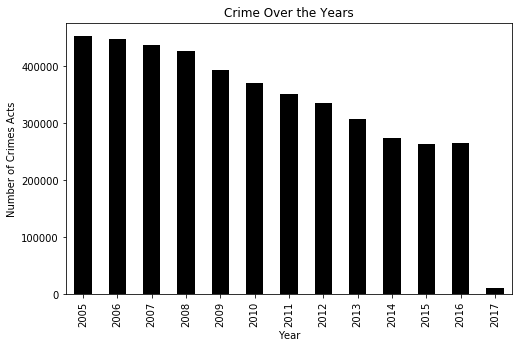

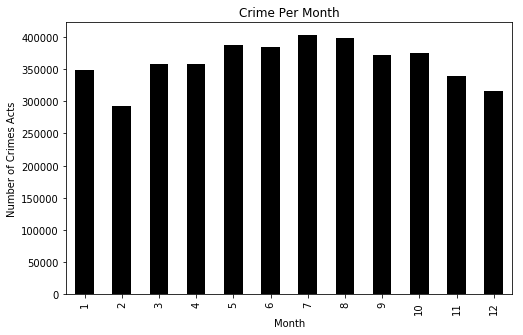

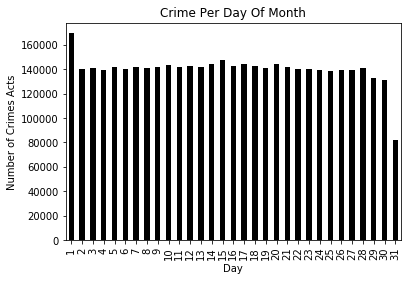

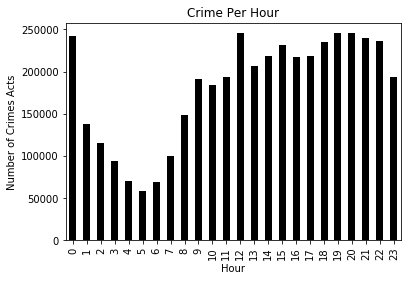

In [13]:
#make graph of crimes per year
plt.figure(figsize = (8,5))
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar(color = 'black')
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar(color = 'black')
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar(color = 'black')
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar(color = 'black')
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

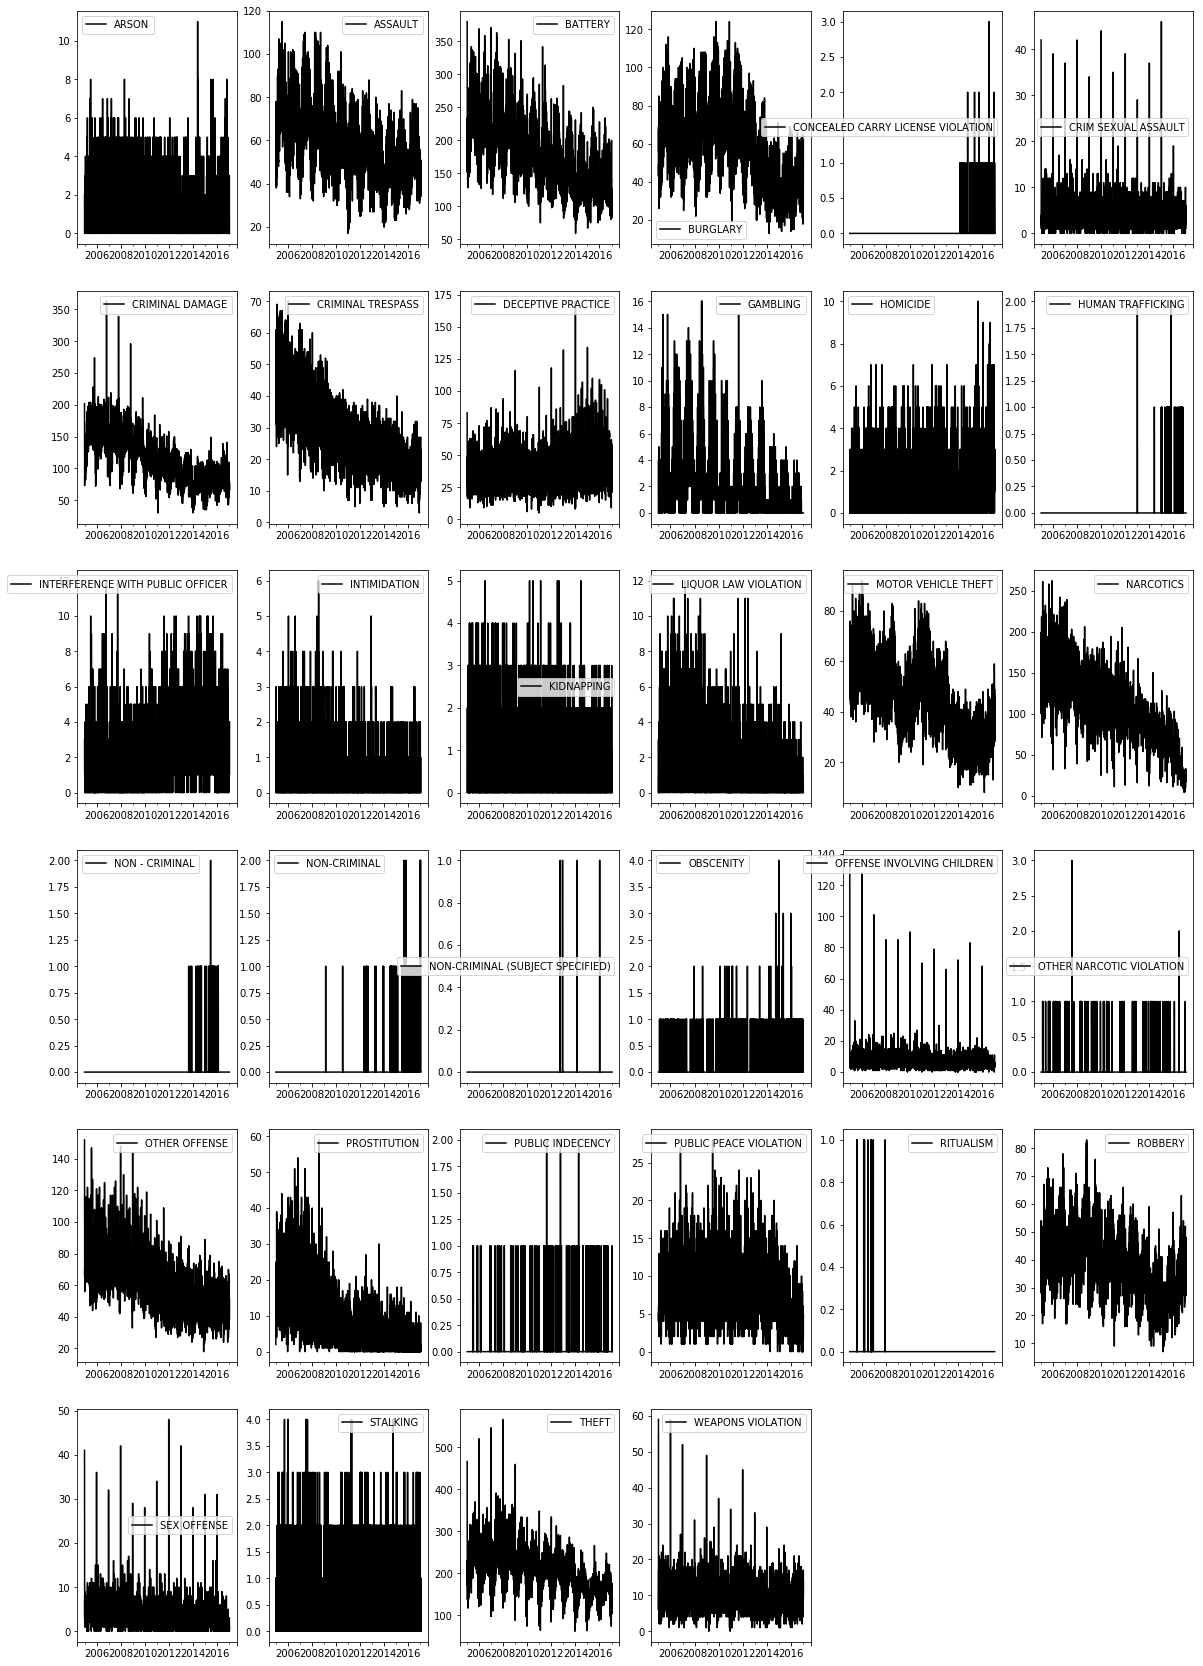

In [14]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)


# In[14]:


# visualize different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False, color = 'black')
plt.show(block=True)

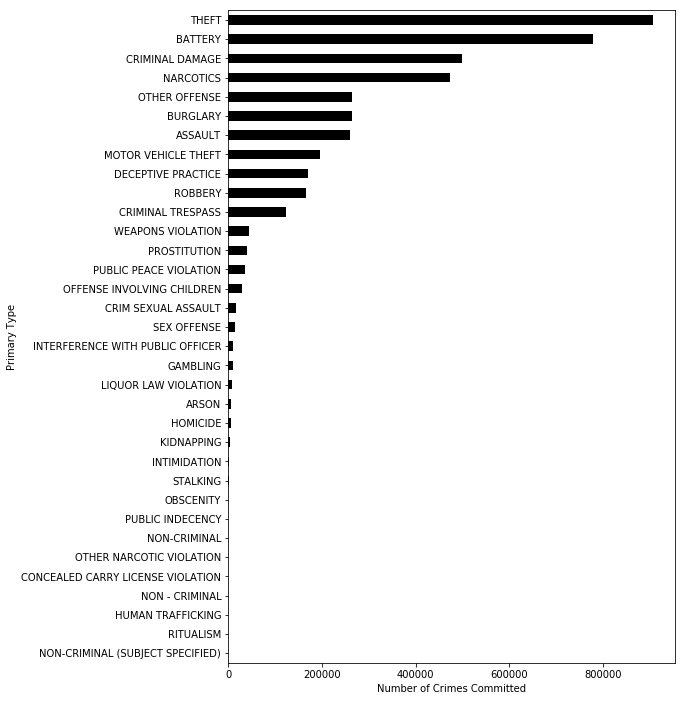

In [15]:
# visualize relative amounts of each type of crime
plt.figure(figsize = (8,12))
Crime_Data.groupby(Crime_Data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh', color = 'black')
plt.xlabel('Number of Crimes Committed')
plt.show(block=True)

In [16]:
Crime_Data_district = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ward = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Ward'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ca = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area'], 
                                         index = Crime_Data.index.date, fill_value = 0)


C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':
C:\Users\sanch\Anaconda3\lib\site-packages\i

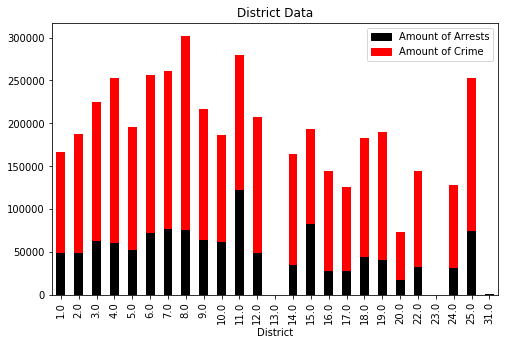

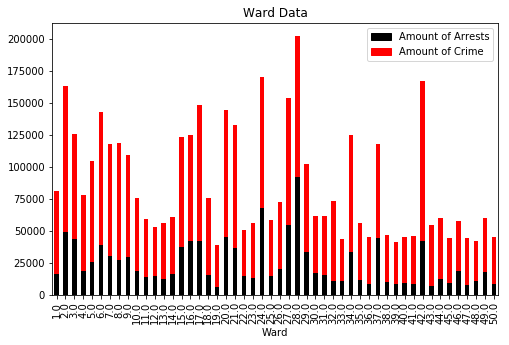

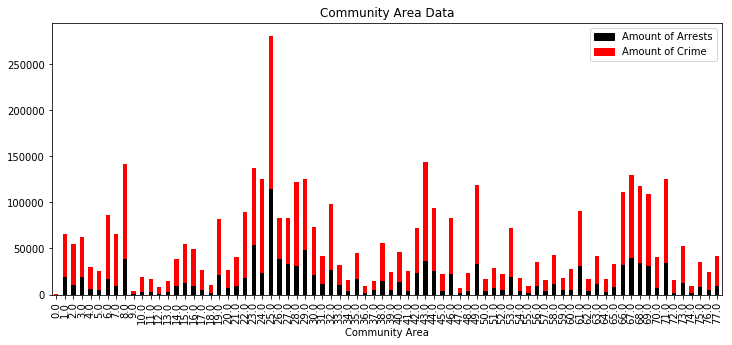

In [17]:
red = mpatches.Patch(color='black', label='Amount of Arrests')
blue = mpatches.Patch(color='red', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['District']).size().plot(kind = 'bar', color = 'red')
Crime_Data_district.sum().plot(kind = 'bar', color = 'black')
plt.title('District Data')
plt.legend(handles=[red, blue])
plt.hold(False)
#crime per ward
plt.figure(figsize = (8,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Ward']).size().plot(kind = 'bar', color = 'red')
Crime_Data_ward.sum().plot(kind = 'bar', color = 'black')
plt.title('Ward Data')
plt.legend(handles=[red, blue])
plt.hold(False)
#crime per Community Area
plt.figure(figsize = (12,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Community Area']).size().plot(kind = 'bar', color = 'red')
Crime_Data_ca.sum().plot(kind = 'bar', color = 'black')
plt.title('Community Area Data')
plt.legend(handles=[red, blue])
plt.hold(False)
plt.show(block=True)

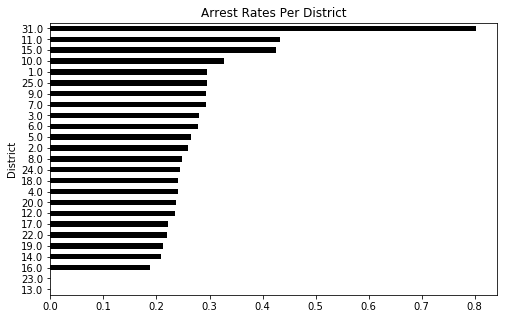

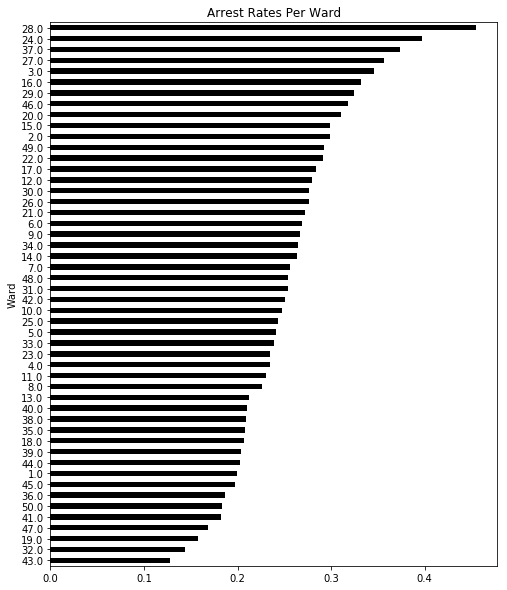

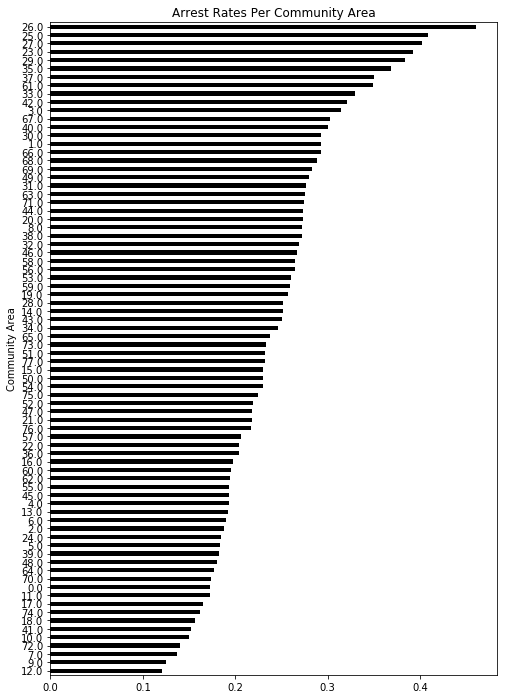

In [18]:
#Arrest rates per community area, ward, and district
A_R_D = Crime_Data_district.sum() / Crime_Data.groupby(Crime_Data['District']).size()
A_R_W = Crime_Data_ward.sum() / Crime_Data.groupby(Crime_Data['Ward']).size()
A_R_CA = Crime_Data_ca.sum() / Crime_Data.groupby(Crime_Data['Community Area']).size()

plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'k')
plt.figure(figsize = (8,10))
A_R_W.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Ward', color = 'k')
plt.figure(figsize=(8,12))
A_R_CA.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'k')
plt.show(block=True)

C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # This is added back by InteractiveShellApp.init_path()


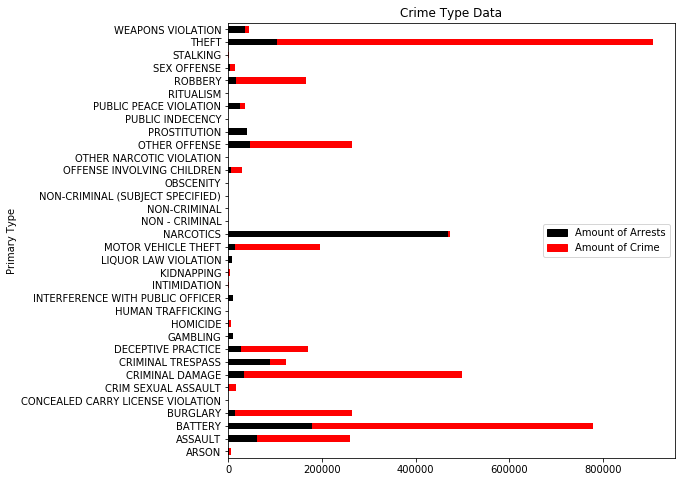

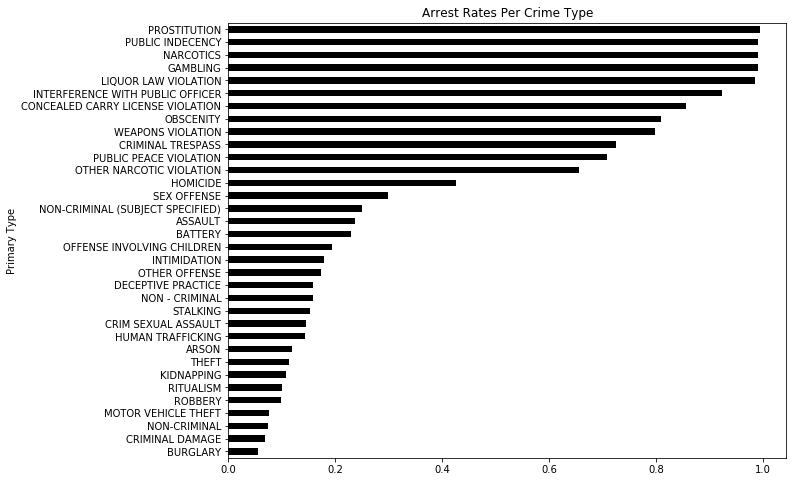

In [19]:
#Arrest rates per crime type
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,8))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh', color='red')
Crime_Data_Type.sum().plot(kind = 'barh', color = 'k')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
plt.hold(False)

plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Crime Type')
plt.show(block=True)

In [20]:
print('--------- end of data exploration---------')
## PREPARING DATA
print('Data Preparing')

--------- end of data exploration---------
Data Preparing


In [21]:
#remove NAs from Longitude and Latitude data
Crime_Data = Crime_Data.dropna(axis = 0, how = 'any')

# drop bad data points

Crime_Data = Crime_Data[Crime_Data.Longitude != '-87.1:00:00 AM']

Arrest_Data = Crime_Data.drop('Arrest', axis = 1)
Arrest_Data = Arrest_Data.drop('Date', axis = 1)
Arrest_Data = Arrest_Data.drop('Block', axis = 1)
Arrest_Target = Crime_Data['Arrest']

Arrest_Data['Primary Type'] = (Arrest_Data['Primary Type']).cat.codes
Arrest_Data['Location Description'] = (Arrest_Data['Location Description']).cat.codes
Arrest_Data['Description'] = (Arrest_Data['Description']).cat.codes

names = []
names = list(Arrest_Data)

In [22]:
print(Arrest_Data.head())
print(Arrest_Target.head())

                          ID  Primary Type  Description  Location Description  \
Date                                                                            
2006-04-02 13:00:00  4673626            24          173                   123   
2006-02-26 13:40:48  4673627            17          218                   139   
2006-01-08 23:16:00  4673628             1           40                   110   
2006-04-05 18:45:00  4673629             2          309                   123   
2006-02-17 21:03:14  4673630            17          267                    15   

                     Domestic  Beat  District  Ward  Community Area  Year  \
Date                                                                        
2006-04-02 13:00:00     False  1622      16.0  45.0            11.0  2006   
2006-02-26 13:40:48     False   321       3.0  20.0            42.0  2006   
2006-01-08 23:16:00     False   321       3.0   5.0            69.0  2006   
2006-04-05 18:45:00     False  1633      16.0  

In [23]:
## BUILDING MODELS

In [24]:
print ('Problem Statement 1 - Classification of Arrests')

Problem Statement 1 - Classification of Arrests


In [25]:
## Naive Bayes 

gnb = GaussianNB()
scores_nb = cross_val_score(gnb, Arrest_Data, Arrest_Target)

print('Mean Cross Validation Accuracy for Naive Bayes: {}'.format(scores_nb.mean()))

Mean Cross Validation Accuracy for Naive Bayes: 0.6834303940436102


In [26]:
## Logistic Regression

logreg = LogisticRegression()
scores_logreg = cross_val_score(logreg, Arrest_Data, Arrest_Target)

print('Mean Cross Validation Accuracy for Logistic Regression: {}'.format(scores_logreg.mean()))

Mean Cross Validation Accuracy for Logistic Regression: 0.7214259674975305


In [27]:
## SVC

#standardize data
ss = StandardScaler()
Arrest_Data_scaled = ss.fit_transform(Arrest_Data)

svc = LinearSVC()
scores_svc = cross_val_score(svc, Arrest_Data_scaled, Arrest_Target)

print('Mean Cross Validation Accuracy for SVC: {}'.format(scores_svc.mean()))

X_trainval, X_test, y_trainval, y_test = train_test_split(Arrest_Data, Arrest_Target)

# tuning hyperparameters for svc using cross-validation
best_score_svc = 0
for opt_c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C = opt_c)
    fold_accuracies_svc = cross_val_score(svm, X_trainval, y_trainval)
    score_svc = fold_accuracies_svc.mean()
    if score_svc > best_score_svc:
        best_param_svc = {'C': opt_c}
        best_score_svc = score_svc
        
svm_opt = SVC(**best_param_svc)
svm_opt.fit(X_trainval, y_trainval)
test_score_svc = svm_opt.score(X_test, y_test)
print("Best Score on validation set: {:.2f}".format(best_score_svc))
print("Best parameters: {}".format(best_param_svc))
print("Test set score: {:.2f}".format(test_score_svc))

KeyboardInterrupt: 

In [ ]:
## Decision Tree 

tree_entropy = DecisionTreeClassifier(criterion="entropy")
scores_dt = cross_val_score(tree_entropy, Arrest_Data, Arrest_Target)

print('Mean Cross Validation Accuracy for Decision Tree: {}'.format(scores_dt.mean()))

# tuning hyperparameters for decision tree using cross-validation
best_score_tree = 0
for i in range(1, 5):
    for j in range(1, 10):
        tree = DecisionTreeClassifier(criterion="entropy", max_depth = i, max_leaf_nodes = j)
        fold_accuracies_tree = cross_val_score(tree, X_trainval, y_trainval)
        score_tree = fold_accuracies_tree.mean()
        if score_tree > best_score_tree:
            best_param_tree = {'criterion' : "entropy", 'max_depth' : i, 'max_leaf_nodes' : j}
            best_score_tree = score_tree
        
tree_opt = SVC(**best_param_tree)
tree_opt.fit(X_trainval, y_trainval)
test_score_tree = tree_opt.score(X_test, y_test)
print("Best Score on validation set: {:.2f}".format(best_score_tree))
print("Best parameters: {}".format(best_param_tree))
print("Test set score: {:.2f}".format(test_score_tree))

# Visualize data
model = tree_entropy.fit(Arrest_Data, Arrest_Target)
dot_data = export_graphviz(tree_entropy, feature_names = names, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
## KNN

#normalize data
mms = MinMaxScaler()
Arrest_Data_norm = mms.fit_transform(Arrest_Data)

knn = KNeighborsClassifier(n_neighbors=1)
scores_knn = cross_val_score(knn, Arrest_Data_norm, Arrest_Target)

print('Mean Cross Validation Accuracy for KNN: {}'.format(scores_knn.mean()))

##Optimizing KNN

# split the dataset into train(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(Arrest_Data, Arrest_Target, test_size = 0.3)

#normalize data
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# visualizing and optimizing hyperparameters for knn classifier using train and test sample
training_accuracy = []
test_accuracy = []
neighbors= [1,2,3]

for opt_k in neighbors:
    # Build the model
    knn_clf = KNeighborsClassifier(n_neighbors = opt_k)
    knn_clf.fit(X_train_norm, y_train)
    
    # Record training set accuracy
    trainAccuracy = knn_clf.score(X_train_norm, y_train)
    training_accuracy.append(trainAccuracy)
    
    # Record test set accuracy
    testAccuracy = knn_clf.score(X_test_norm, y_test)
    test_accuracy.append(testAccuracy)

# Visualize train and test accuracy
plt.plot(neighbors, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()